# Data Wrangling

There are standard data exploring and cleaning (section "Inspecting data") and basic data wrangling procedures (Step 1 of "Transforming Data") contained in this script. However, some heavier data transformations also happen in the "Transforming Data" section, with the most complex parts being 3 and 5. In step 3, view and complete events are allocated to offer received events. Block ids for these sets of events that identify which receive, view and complete belong together are created. In step 5, the transactions are allocated to these blocks.

## References

[1] August 14, 2021, Data to Fish, 'How to convert Integers to datetime in Pandas DataFrame'. URL: https://datatofish.com/integers-datetime-pandas-dataframe/

[2] Stackoverflow: https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib; Question by Open the way: https://stackoverflow.com/users/171546/open-the-way; Answer by Gustavo Bezerra: https://stackoverflow.com/users/2132753/gustavo-bezerra

[3] Stackoverflow: https://stackoverflow.com/questions/53986451/calculate-date-difference-between-todays-date-and-pandas-date-series/53986547; Question by Shivam: https://stackoverflow.com/users/10851563/shivam; Answer by k88: https://stackoverflow.com/users/5682512/k88

[4] Satckoverflow: https://stackoverflow.com/questions/2119472/convert-a-timedelta-to-days-hours-and-minutes; Question by Oli: https://stackoverflow.com/users/12870/oli; Answer by Alex Martelli: https://stackoverflow.com/users/95810/alex-martelli

[5] Stackoverflow: https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list; Question by Melsauce: https://stackoverflow.com/users/5858873/melsauce; Answer by piRsquared: https://stackoverflow.com/users/2336654/pirsquared

[6] Stackoverflow: https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas; Question by Ilaffin: https://stackoverflow.com/users/6157698/llaffin; Answer by joris: https://stackoverflow.com/users/653364/joris

[7] Stackoverflow: https://stackoverflow.com/questions/34989341/how-to-remove-nan-value-while-combining-two-column-in-panda-data-frame; Question by imSonuGupta: https://stackoverflow.com/users/3101669/imsonugupta; Answer by jpp: https://stackoverflow.com/users/9209546/jpp

[8] Stackoverflow: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists; Question by Emma: https://stackoverflow.com/users/110527/emma; Answer by Alex Martelli: https://stackoverflow.com/users/95810/alex-martelli

[9] Stackoverflow: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists; Question by Emma: https://stackoverflow.com/users/110527/emma; Answer by Alex Martelli: https://stackoverflow.com/users/95810/alex-martelli

[10] dfriends.com by Dan Friedman, April 15, 2019: https://dfrieds.com/data-analysis/rank-method-python-pandas.html

[11] Stackoverflow: https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe; Question by anonuser0428:https://stackoverflow.com/users/1009091/anonuser0428; Answer by ntg: https://stackoverflow.com/users/508907/ntg

[12] Stackoverflow: https://stackoverflow.com/questions/38203352/expand-pandas-dataframe-column-into-multiple-rows; Question by gozzilli: https://stackoverflow.com/users/277113/gozzilli; Answer by philshem: https://stackoverflow.com/users/2327328/philshem

[13] Stackoverflow: https://stackoverflow.com/questions/41415017/count-unique-values-using-pandas-groupby/41415028; Question by user1684046: https://stackoverflow.com/users/1684046/user1684046; Answer by jezrael: https://stackoverflow.com/users/2901002/jezrael

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import os
from matplotlib import pyplot as plt

In [2]:
os.chdir(r'C:\Users\j\Documents\udacity-ds-nanodegree\starbucks-project')

In [3]:
# Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Inspect data

In this section, I inspect all three dataframes to assert data quality, define steps for data cleaning, and get a first impression of the data.
Further exploration can only be carried out after complex data transformations, which are also required to carry out the actual analysis.

In [4]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
transcript.head(10)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


## profile data

#### Summary of inspection of data in profile table:
* As I cannot judge if this is a representative sample of the Starbucks App user population, I will assume it is.
* The table only contains **unique records** of app-users. No deduplication is needed.
* Around 12.8% of these users have **missing information** for all three demographic variables. I believe that this data should not be imputed. It cannot be *derived/predicted* from any other variables, as all other variables will be part of the prediction model. In addition, these demographic values will be important predictors for the model themselves, therefore imputation like using the mean/median or mode seems too "rough" an approach. I will instead check if the people without information are systematically different from those with information, and if not, I will drop the records. In order to make this assessment, the data needs to be transformed.
* The **gender** is not 50-50, as would be expected from the general population. It is, however, possible that the split is representative of the wider Starbucks App subscriber population.
* The **age** distribution suggests that the sample is rather old, which I find surprising for Stabrucks users. Other than that the age range seems plausible.
* The  **income** appears to have been capped both at the lower and higher end. Other than that the distribution seems plausible, showing the typical right skew that income data often displays.
* The **membership** column has no missings and the data range is plausible. Most memberships are more recent, which makes sense considering that consumers probably drop out after a certain amount of time.

In [7]:
# Number of unique users, check for duplicates
print("Number of unique user: ", profile['id'].nunique())
print("Number of users in df: ", profile.shape[0])

Number of unique user:  17000
Number of users in df:  17000


In [8]:
# Assess "gender" column
print("Categorical codes for gender column: ",
      profile['gender'].value_counts())
print("Number of missing values in gender column: ",
      profile['gender'].isna().sum())

Categorical codes for gender column:  M    8484
F    6129
O     212
Name: gender, dtype: int64
Number of missing values in gender column:  2175


Lowest age in dataset:  18.0
Highest age in dataset:  101.0
Number of missing values in age column:  2175


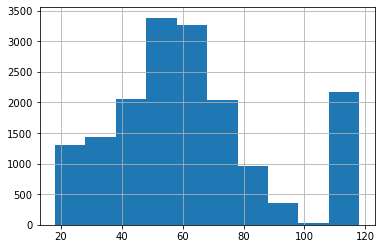

In [9]:
# Assess "age" column distribution, code 118 is missing information
# >> surprisingly old population considering company is Starbucks
profile['age'].hist()

# Recode 118 inta np.nan
profile.loc[profile['age'] == 118, 'age'] = np.nan

# Get min and max values, and missing values
print("Lowest age in dataset: ", profile['age'].min())
print("Highest age in dataset: ", profile['age'].max())
print("Number of missing values in age column: ", profile['age'].isna().sum())

Lowest age in dataset:  30000.0
Highest age in dataset:  120000.0
Number of missing values in income column:  2175


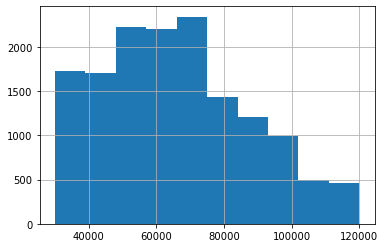

In [10]:
# Assess "income" column distribution
# >> I assume income was cropped at a min and max value
profile['income'].hist()

# get min and max values, and missing values
print("Lowest age in dataset: ", profile['income'].min())
print("Highest age in dataset: ", profile['income'].max())
print("Number of missing values in income column: ",
      profile['income'].isna().sum())

In [11]:
# Check if the missings are the same for all three columns
all_missing = profile.loc[(profile['income'].isna()) & (
    profile['age'].isna()) & (profile['gender'].isna())].shape[0]
print("Records that have all three demographic attributes missing: ", all_missing)

Records that have all three demographic attributes missing:  2175


In [12]:
# Assess share of records without demographic information out of all records
all_missing/profile.shape[0]

0.12794117647058822

Need to assess if those who did not provide demographic data are systematically different from those who did to decide if I can remove them from the sample. I will compare:
* Incremental spend and offers completed: Those are variables that I will **predict**, so there should not be any bias in them
In order to assess this, the data needs to be transformed. The assessment happens in the Analysis notebook.

In [13]:
# Assess "membership" column; Change to datetime format [1]
profile['became_member_on'] = pd.to_datetime(
    profile['became_member_on'], format='%Y%m%d')

Earliest membership date:  2013-07-29 00:00:00
Latest membership date:  2018-07-26 00:00:00


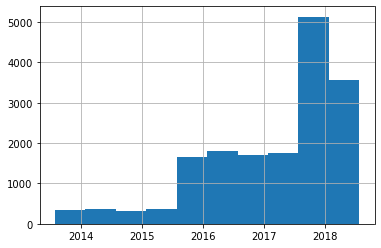

In [14]:
print("Earliest membership date: ", profile['became_member_on'].min())
print("Latest membership date: ", profile['became_member_on'].max())
profile['became_member_on'].hist()
plt.show()

## portfolio data

#### Summary of inspection of data in portfolio table
* There is total of 10 offers
* Intuitively, the expectation would be that a reward rises with difficulty, and that duration rises with difficulty. 
* When examining the data through scatterplots, this relationship is not actually that clear. There are some offers that appear  less attractive than others.
* However, these offers vary on further attributes, like type and channels

In [15]:
portfolio.head(10).sort_values(by=['offer_type'])

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837


In [16]:
# Check uniqueness of offer ids
portfolio['id'].nunique()

10

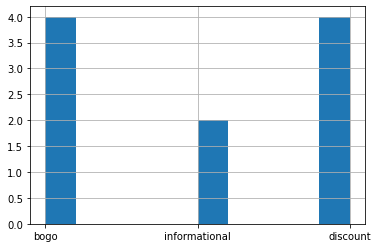

In [17]:
# Number of offers per type
portfolio['offer_type'].hist()
plt.show()

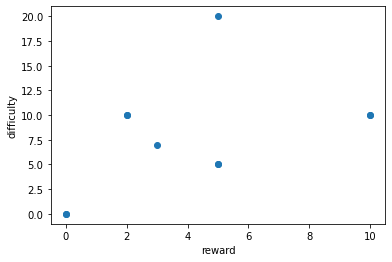

In [18]:
# Examine relationship between attributes
plt.scatter(portfolio['reward'], portfolio['difficulty'])
plt.xlabel('reward')
plt.ylabel('difficulty')
plt.show()

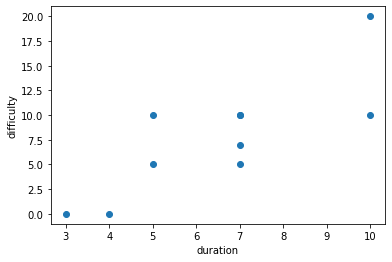

In [19]:
# Examine relationship between attributes
plt.scatter(portfolio['duration'], portfolio['difficulty'])
plt.xlabel('duration')
plt.ylabel('difficulty')
plt.show()

## transaction data

#### Summary of inspection of data in transaction table
* The logical funnel for an offer is *receive >> view >> complete*
* However, this funnel can be shortened to *receive >> view* and also to *receive >> complete*, or switched to *receive >> complete >> view*
* The maximum number of offers someone can receive is 6
* Most people receive 5 offers
* Most people view 3 offers
* Most people complete 2 offers

In [21]:
# How many offers does a person receive?
offers_h = transcript.loc[transcript['event'] ==
                          'offer received'].groupby(['person']).size()
views_h = transcript.loc[transcript['event'] ==
                         'offer viewed'].groupby(['person']).size()
completes_h = transcript.loc[transcript['event']
                             == 'offer completed'].groupby(['person']).size()

In [23]:
# max number of offers, needed to define bins in histogram
offers_h.max()

6

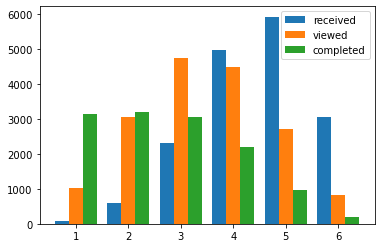

In [24]:
# [2]
plt.hist([offers_h, views_h, completes_h], bins=[1, 2, 3, 4, 5, 6, 7],
         align='left', label=['received', 'viewed', 'completed'])
plt.legend()
plt.show()

# Transform data
* **Step 1:** Wrangle all three dataframes and create master df which is based on transaction frame but without transactions. This df will be transformed to be fit for analysis.
* **Step 2:** Answer some relevant questions about the general experimental setup
* **Step 3:** Transform master df to create a table which has one record per person and offer, and which contains additional information on this particular offer (e.g. if it was viewed or completed)
* **Step 4:** Create derived variables
* **Step 5:** Add transaction value; Create dataframe which only contains offers that consumer was aware of.
* **Step 6:** Create final dataframe for analysis with variable "incremental spend"

## Step 1: Wrangle all three dataframes

### profile data

In [25]:
# Calculate duration of membership [1][3][4]
profile['became_member_on'] = pd.to_datetime(
    profile['became_member_on'], format='%Y%m%d')
profile['membership_duration'] = profile['became_member_on'] - \
    pd.to_datetime("now")
profile['membership_duration'] = profile['membership_duration'].dt.days

### portfolio data

In [26]:
# Calculate until when offer is valid
portfolio = portfolio.rename(columns={'reward': 'offer_reward', 'channels': 'offer_channels',
                             'difficulty': 'offer_difficulty', 'duration': 'offer_duration'})
portfolio['offer_duration'] = portfolio['offer_duration']*24
portfolio['offer_valid_until'] = np.nan


# One-hot-encoding channels [5]
portfolio = portfolio.drop('offer_channels', 1).join(
    portfolio['offer_channels'].str.join('|').str.get_dummies())

### transaction data

In [27]:
# Create master frame [6]
# Turn the value column which lists different events into separate columns
master = pd.concat([transcript, pd.DataFrame(
    transcript['value'].tolist())], axis=1)

# There are cases where the offer id is offer_id in the 'value' dictionary. Need to combine both columns. [7]
master['offer id'].update(master.pop('offer_id'))
master = master.rename(columns={
                       'offer id': 'event_offer_id', 'amount': 'event_amount', 'reward': 'event_reward'})

# Remove all transaction records
master = master.loc[master['event'] != 'transaction']
# Remove event_amount column as not needed
master = master.drop('event_amount', axis=1)

In [28]:
# Merge portfolio table
master = pd.merge(master, portfolio[['offer_type', 'offer_reward', 'offer_difficulty', 'offer_duration', 'email',
                  'web', 'social', 'mobile']], how='left', left_on=master['event_offer_id'], right_on=portfolio['id'])
master = master.drop('key_0', axis=1)

# Create derived variable offer_valid_until
master.loc[master['event'] == 'offer received',
           'offer_valid_until'] = master['time'] + master['offer_duration']
# Offer cannot be valid for longer than the duration of the experiment for purposes of this analysis
# Total hours of experiment
max_hour = transcript['time'].max()
master.loc[master['offer_valid_until'] >
           max_hour, 'offer_valid_until'] = max_hour

## Step 2: Understand experiment setup in more detail

### When do offers get sent out?
At 6 distinct points in time. They are not spaced out evenly, and a slightly different amount of offers is sent out each time

In [29]:
master_receive = master.loc[master['event'] == 'offer received']
master_receive_gr = pd.DataFrame(
    master_receive.groupby(['time']).size().reset_index())

In [30]:
master_receive_gr

,time,0
0,0,12650
1,168,12669
2,336,12711
3,408,12778
4,504,12704
5,576,12765


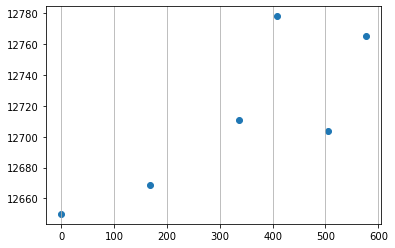

In [31]:
minor_ticks = np.arange(0, 600, 24)
plt.scatter(master_receive_gr['time'], master_receive_gr[0])
plt.grid(axis='x')
plt.show()

### Does a specific offer only get sent out at one point in time? 
No
### Do different offers get sent out at the same time?
Yes

In [32]:
pd.crosstab(master_receive['event_offer_id'], master_receive['time'])

time,0,168,336,408,504,576
event_offer_id,,,,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,1297,1245,1322,1269,1258,1277
2298d6c36e964ae4a3e7e9706d1fb8c2,1221,1250,1301,1274,1286,1314
2906b810c7d4411798c6938adc9daaa5,1257,1270,1263,1335,1286,1221
3f207df678b143eea3cee63160fa8bed,1273,1266,1279,1275,1229,1295
4d5c57ea9a6940dd891ad53e9dbe8da0,1218,1240,1280,1308,1310,1237
5a8bc65990b245e5a138643cd4eb9837,1266,1270,1256,1293,1238,1295
9b98b8c7a33c4b65b9aebfe6a799e6d9,1245,1296,1275,1274,1261,1326
ae264e3637204a6fb9bb56bc8210ddfd,1292,1319,1245,1278,1248,1276
f19421c1d4aa40978ebb69ca19b0e20d,1263,1263,1247,1250,1305,1243


### Can a person receive the same offer multiple times?
Yes, the maximum a person has received the same offer is 5 times

In [33]:
pd.crosstab(master_receive['person'],
            master_receive['event_offer_id']).max().max()

5

### Can a person receive a new offer whilst another one is still active?
Yes, this happens frequently

In [34]:
# Create subset
offer_logic_check = master_receive[['person', 'event_offer_id',
                                    'time', 'offer_valid_until']].sort_values(by=['person', 'time'])

In [35]:
# Shift row values one row down
offer_logic_check['shift_time'] = offer_logic_check['offer_valid_until'].shift(
    periods=1)
offer_logic_check['shift_person'] = offer_logic_check['person'].shift(
    periods=1)
# Create checking column, populate only with 0
offer_logic_check['previous_offer_still_valid'] = 'no overlap'
# Populate checking column with 1 if new offer overlaps with previous offer
offer_logic_check.loc[(offer_logic_check['shift_person'] == offer_logic_check['person']) & (
    offer_logic_check['shift_time'] > offer_logic_check['time']), 'previous_offer_still_valid'] = 'overlap'
# Count occurences where new offer overlaps with previous offer
offer_logic_check['previous_offer_still_valid'].value_counts()

no overlap    46730
overlap       29547
Name: previous_offer_still_valid, dtype: int64

### Can a person receive a new offer whilst still being aware of an active, not completed offer?
Yes, seen upon visual inspection of the data
### If yes, can this be the *same* offer?
Yes, seen upon visual inspection of the data

## Step 3: Wrangle master table

### Step 3.1 Identify unique blocks of offer receive events with views and completes

I need to be able to uniquely identify an "offer block". An offer block defines a person-x-offer combination, where an offer block starts with a receive and contains *exactly* one receive, and a maximum of one view and one complete. This will be achieved in two stages
* In a first step, an ID will be assigned to each offer block that uniquely identifies a person x offer combination
* Following this, offer blocks that still contain multiple receives because a person received a specific offer multiple times will be split up.

Data checks will be done after these transformations.

#### Step 3.1.1

In [36]:
# Sort the master dataframe. This is essential for the further steps.
master = master.sort_values(by=['person', 'event_offer_id', 'time'])

In [37]:
# Create a dataframe that creates a unique identifier for each person and offer combination
person_offer_id_df = master.loc[master['event'] == 'offer received', [
    'person', 'event_offer_id']].drop_duplicates().reset_index().rename(columns={'index': 'person_offer_id'})
# Merge the id back into the master dataframe
master = pd.merge(master, person_offer_id_df, how='left', left_on=[
                  'person', 'event_offer_id'], right_on=['person', 'event_offer_id'])

In [38]:
# Because one person can receive the same offer multiple times, some offer blocks will have multiple offer received.
max_same_offer = master.loc[master['event'] == 'offer received'].groupby(
    by=['person_offer_id']).size().max()
print("The most times one person has received the same offer is:", max_same_offer)

The most times one person has received the same offer is: 5


#### Step 3.1.2

Because one person can receive the same offer multiple times, these offer blocks need to be broken down further into offer blocks, where each "receive" starts its own offer block. First, the person_offer_ids where the block has multiple receives need to be identified.

In [39]:
receives_per_block = master.loc[master['event'] == 'offer received'].groupby(
    by=['person_offer_id']).size()

In [40]:
receives_per_block_df = pd.DataFrame(receives_per_block)

In [41]:
blocks_need_subsplit = receives_per_block_df.loc[receives_per_block_df[0] > 1].index.tolist(
)

Now I will loop through these blocks and split them up into separate blocks.
Approach:
* Create a subset of the master dataframe that only contains records that belong to the specific person_offer_id
* Identify indices of "offer receive" records.
* Loop through each "offer receive" record. Allocate views and completes to the receive record. Mark receive, view and complete records that belong together with the same number in the 'sub_block' column.
* The allocation logic is:
> * Begin the loop at the earliest "receive".
> * In each loop, allocate a maximum of one view and one complete to the receive.
> * The views and completes get allocated to the earliest receive in whose validity time-frame they fall, unless that receive already has a view and complete allocated.
> * If a view or complete is "taken" by a receive, it cannot be re-allocated to another receive.
> * A view and a complete can only ever be allocated to one receive.

Caveat: In this approach, I allocate a view to the first receive, even if that receive is already completed. That could mean that a second offer does not receive the view, even though for the second offer the view would have created awareness. This means that I could "miss" periods of awareness. That would mean that I attribute too much spend to the unaware state. However, it is unclear and not clarified anywhere if someone can view an offer after having completed it, which is why the current approach is valid. We do know from the data that people can see expired offers.

In [42]:
# Establish list to store block allocations
sub_block_list = []

In [43]:
for person_offer_id in blocks_need_subsplit:
    # Create the dataframe-subset of interest
    df = master.loc[master['person_offer_id'] ==
                    person_offer_id][['event', 'offer_valid_until', 'time']]
    df['sub_block'] = np.nan
    # Create a dictionary to store the indices, valid_untils and timestamps (i.e. time of reception) of receive records
    receive_dict = df.loc[df['event'] == 'offer received'][[
        'offer_valid_until', 'time']].reset_index().to_dict(orient='records')

    # Loop through the "receive" records and allocate views and completes
    for i in range(len(receive_dict)):
        # Set key variables for filtering
        offer_start_time = receive_dict[i]['time']
        validity = receive_dict[i]['offer_valid_until']
        # Filter the block for views and receives within the right timeframe (from offer receive to offer validity end). Only keep such views and completes that do not yet belong to another receive
        df_for_loop = df.loc[(df['time'] <= validity) & (df['time'] >= offer_start_time) & (
            df['event'] != 'offer received') & (df['sub_block'].isna())]
        # Reset the index so you can access it later
        df_for_loop = df_for_loop.reset_index()
        # Number the rows using sql and select only the first entries [10]
        df_for_loop['counter_check_inner2'] = df_for_loop.groupby(
            ['event'])['time'].rank(method='first')
        df_from_loop = df_for_loop.loc[df_for_loop['counter_check_inner2'] == 1]

        # Extract the indices of the rows that belong to the "receive" you are examining in this loop
        rows_affected_list = df_from_loop['index'].to_list()

        # Mark the "receive" you are assessing in the original data, so it is clear it belongs to a specific offer block
        df.loc[df.index == receive_dict[i]['index'], 'sub_block'] = i
        # Mark the "view" and "complete" rows in the original df, so it is clear they belong to this specific "receive"
        df.loc[df.index.isin(rows_affected_list), 'sub_block'] = i

    # Create a dictionary with index and block allocation
    df = df.reset_index()
    allocation = df[['index', 'sub_block']].to_dict(orient='records')
    # Append this dictionary to the sub_block_list
    sub_block_list.append(allocation)

In [44]:
# Flatten the resulting list into a list of dicts [8]
flat_list = [i for i in sub_block_list for i in i]

In [45]:
# Fill NaNs in flat list with 9999.
# These NaN values are "views" of expired offers and are hence irrelevant for offer awareness. They can be deleted.
df_flat_list = pd.DataFrame(flat_list)
df_flat_list.loc[df_flat_list['sub_block'].isna(), 'sub_block'] = 9999

In [46]:
# Merge the sub-block labels into master_interim, which is a temporary copy of master
master_interim = pd.merge(master, df_flat_list,
                          how='left', left_index=True, right_on='index')
# Re-add indices from master to master_interim
master_interim.index = master.index
# Reassign "master"
master = master_interim

In [47]:
# Clean out columns with obsolete views
master = master.loc[master['sub_block'] != 9999]

In [48]:
# Create a new block index from the original person_offer_id (i.e. the block id) and the sub_blocks that uniquely identifies all sub-blocks
block_id_lookup = master[['person_offer_id', 'sub_block']
                         ].drop_duplicates().reset_index(drop=True)
block_id_lookup = block_id_lookup.reset_index().rename(
    columns={'index': 'block_id'})

# Merge the new index into the dataframe
master = pd.merge(master, block_id_lookup, how='left', left_on=[
                  'person_offer_id', 'sub_block'], right_on=['person_offer_id', 'sub_block'])

# Remove obsolete index columns
master = master.drop(['person_offer_id', 'sub_block', 'index'], axis=1)

##### Data checks:

In [49]:
# Datacheck 1: No more than 3 rows per block_id (except transactions)
check1 = master.groupby(by=['block_id']).size().sort_values()

check1 = pd.DataFrame(check1)

check1.groupby(by=[0]).size()

0
1    13077
2    35457
3    27743
dtype: int64

In [50]:
# Datacheck 2: Only 0 or 1 of each event type per block_id (except transactions)
check2 = master[['block_id', 'event']]

check2 = check2.pivot_table(
    index='block_id', columns='event', aggfunc=len, fill_value=0)

check2.max()

event
offer completed    1
offer received     1
offer viewed       1
dtype: int64

In [51]:
# Datacheck 3: Every block has a receive

In [52]:
check2.sum()

event
offer completed    33579
offer received     76277
offer viewed       57364
dtype: int64

In [53]:
check2.shape[0]

76277

##### Save a csv of the master file.

In [54]:
# Save the file
master.to_csv(r'2021_01_09_interim_file.csv')

In [55]:
# Read in the file
master = pd.read_csv(r'2021_01_09_interim_file.csv')

### Step 3.2 Transform the table so that each block has one row

In [56]:
# Create pivot with time of event
master_pivot = master.pivot_table(
    index='block_id', columns='event', values='time', fill_value=np.nan)

In [57]:
# Keep only one row with all relevant values per offer (the max statement does that)
master_collapse = master[['block_id', 'person', 'event_offer_id', 'event_reward', 'offer_type', 'offer_reward',
                          'offer_duration', 'offer_valid_until', 'offer_difficulty', 'email', 'web', 'social', 'mobile']]
master_collapse = master_collapse.groupby(by=['block_id']).max()

In [58]:
# Merge the collapsed master frame with the event - time information from the master_pivot
master = pd.merge(master_pivot, master_collapse, how='left',
                  right_index=True, left_index=True)

In [59]:
master = master[['event_offer_id', 'person', 'offer received', 'offer viewed', 'offer completed', 'event_reward',
                 'offer_type', 'offer_reward', 'offer_duration', 'offer_valid_until', 'offer_difficulty', 'email', 'web', 'social', 'mobile']]

## Step 4: Create derived variables
Some of the derived variables will be used frequently; other will not be used but are available if one wanted to run more analyses on them.
The awareness period for offers with offer awareness is 'offer viewed' to 'factual_validity_end'

In [60]:
# Was valid until (either expiry date or completion date)
master['factual_validity_end'] = master[[
    'offer completed', 'offer_valid_until']].min(axis=1)
# Cut validity when experiment ends, although offer might still be valid for longer
# However, there are no further transaction observations
master.loc[master['factual_validity_end'] > transcript['time'].max(
), 'factual_validity_end'] = transcript['time'].max()

# Was completed
master['was_completed'] = 1
master.loc[master['offer completed'].isna(), 'was_completed'] = 0

# Was aware binary
master['was_aware'] = 0
master.loc[(master['offer viewed'] != np.nan) & (
    master['offer viewed'] < master['factual_validity_end']), 'was_aware'] = 1

# Time taken to become aware
master['time_lag_awareness'] = np.nan
master.loc[master['was_aware'] == 1,
           'time_lag_awareness'] = master['offer viewed'] - master['offer received']

# Time taken to complete when aware
master['time_lag_completion'] = np.nan
master.loc[(master['was_aware'] == 1) & (master['was_completed'] == 1),
           'time_lag_completion'] = master['offer completed'] - master['offer viewed']

# Time left between completion and natural expiry when aware
master['time_lag_completion_to_expiry'] = np.nan
master.loc[(master['was_aware'] == 1) & (master['was_completed'] == 1),
           'time_lag_completion_to_expiry'] = master['offer_valid_until'] - master['offer completed']

## Step 5: Insert transaction values

### 5.1: Set up transaction df

In [61]:
tx = transcript.loc[transcript['event'] == 'transaction'].reset_index().rename(
    columns={'index': 'tx_id', 'time': 'time_of_transaction'})
tx = pd.concat([tx, pd.DataFrame(tx['value'].tolist())],
               axis=1)  # Extract the amount value
tx = tx.drop(['event', 'value'], axis=1)

In [62]:
tx.head()

,tx_id,person,time_of_transaction,amount
0,12654,02c083884c7d45b39cc68e1314fec56c,0,0.83
1,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56
2,12659,54890f68699049c2a04d415abc25e717,0,13.23
3,12670,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51
4,12671,fe97aa22dd3e48c8b143116a8403dd52,0,18.97


### 5.2 Set up awareness dataframe

Each transaction needs to be allocated to one or more block ids. To achieve this, the awareness dataframe is created that contains one row for each point in time t that a person was aware of an offer. Then this is merged onto the transaction dataframe from step 5.1. From this df one can then see if a transaction happened during aware or anaware time, and *if* it was during unaware time if the person was only aware of one offer or of multiple offers.
If a person was aware of multiple offers, the transaction gets allocated based on the following logic:
* The transaction gets allocated to the first offer that was completed because then the spend clearly helped to complete that offer
* If no offer was completed then the amount is split evenly
* If a transaction serves to complete multiple offers at the same time, then the amount is split evenly among these offers.

The following improvement is thinkable: When multiple offers get completed at once, but they have different difficulty, the amount is allocated based on the respective difficulty.

In [63]:
# Set up the awareness frame - only keep offers that a person was aware of. All other time is unaware time.
aw = master[['person', 'event_offer_id', 'offer viewed', 'factual_validity_end',
             'was_aware']].loc[master['was_aware'] == 1].reset_index().drop('was_aware', axis=1)

In [64]:
aw['rows_needed'] = aw['factual_validity_end'] - aw['offer viewed'] + 1

In [65]:
# Create a dictionary with block ids and number of rows needed per block id
block_ids, lines = aw['block_id'], aw['rows_needed']
dict1 = pd.Series(lines.values, block_ids.values).to_dict()

In [66]:
# Create list of all block ids to use in list comprehension
block_id_list = aw['block_id'].tolist()

In [67]:
# Create list with number of each block id appearing as many times as rows are needed
'''
Example: 
block id 1 had awareness for 10 hours 
>> for block id 1, 10 rows are needed 
>> block id 1 appears 10 times in the list
'''
row_list = [[i for j in range(int(dict1[i]))] for i in block_id_list]

# Flatten the list as is currently list of lists [9]
row_list = [i for sublist in row_list for i in sublist]

In [68]:
# Merge in the original information
aw_expanded = pd.merge(pd.DataFrame(row_list).rename(
    columns={0: 'block_id'}), aw, how='left', left_on='block_id', right_on='block_id')

In [69]:
# add row numbers that can then be transformed to hours [10]
aw_expanded['counter'] = aw_expanded.groupby(
    ['block_id'])['offer viewed'].rank(method='first')

In [70]:
# Calculate columns with separate hours
aw_hourly = aw_expanded
aw_hourly['hour'] = aw_hourly['counter'] + aw_hourly['offer viewed'] - 1

In [71]:
aw_hourly = aw_hourly[['block_id', 'person',
                       'event_offer_id', 'hour', 'offer viewed']]

### 5.3 Combine both dataframes, create control and treatment frame and allocate block ids to transactions where a customer was aware ( = treatment)

In [72]:
tx_block_ids = pd.merge(tx, aw_hourly, how='left', left_on=[
                        'person', 'time_of_transaction'], right_on=['person', 'hour'])

In [73]:
# What is the maximum how many blocks a transaction could be allocated to
count_tx_ids = tx_block_ids[['tx_id']].groupby(by=['tx_id']).size()
count_tx_ids.max()

3

In [74]:
# How many overlap cases exist?
pd.DataFrame(count_tx_ids).value_counts()

1    133710
2      5117
3       126
dtype: int64

#### Separate the transactions that happened during non-awareness (control) from those that happened during awareness

In [75]:
# Split tx_block_ids into a control and treatment frame
# Not aware or no active offer
tx_control = tx_block_ids.loc[tx_block_ids['event_offer_id'].isna()]
tx_treatment = tx_block_ids.loc[~tx_block_ids['event_offer_id'].isna()]

#### Separate the non-overlap treatment cases from the overlap treatment cases

In [76]:
# Identify transaction ids with multiple block_ids, i.e. those with more than 1 row in the tx_treatment dataframe
tx_treatment_gr = tx_treatment[['tx_id']].groupby(by=['tx_id']).size()
tx_treatment_block_id_count = pd.merge(tx_treatment, pd.DataFrame(tx_treatment_gr).rename(
    columns={0: 'count'}), how='left', left_on='tx_id', right_index=True)

In [77]:
# Remove cases without overlap and store in separate df as these need further treatment
tx_treatment_no_overlap = tx_treatment_block_id_count.loc[
    tx_treatment_block_id_count['count'] == 1]
tx_treatment_overlap = tx_treatment_block_id_count.loc[tx_treatment_block_id_count['count'] > 1]

In [78]:
# Create a dictionary for the non-overlap treatment cases where transaction id is the key and block id is the value
id_tx_fordict, block_id_fordict = tx_treatment_no_overlap[
    'tx_id'], tx_treatment_no_overlap['block_id']
dict_treatment_no_overlap = pd.Series(
    block_id_fordict.values, id_tx_fordict.values).to_dict()

#### Allocate transaction ids with offer overlap to the correct offer(s) (i.e. block_ids)

In [79]:
# Add information on whether an offer was completed
tx_treatment_overlap = pd.merge(tx_treatment_overlap, master[[
                                'was_completed', 'offer completed']], how='left', left_on='block_id', right_index=True)

In [80]:
# Add ranks to all completed block_ids and give those that are completed simultaneously the same rank [10]
tx_treatment_overlap['rank'] = tx_treatment_overlap.groupby(
    ['tx_id'])['offer completed'].rank(method='min')

In [81]:
# Sort dataframe within tx id by time the offer was viewed
tx_treatment_overlap = tx_treatment_overlap.sort_values(by=['tx_id', 'rank'])

In [82]:
# Create list of all transaction ids that need to be processed due to offer overlap
tx_ids_with_overlap = tx_treatment_overlap['tx_id'].tolist()
# Remove all duplicates
tx_ids_with_overlap = list(set(tx_ids_with_overlap))

In [83]:
# Allocate block ids to transaction ids
'''
In the dict, the key will be the transaction id and the value the block id.
If a transaction needs to be split between multiple offers, then there will be a list of offer ids.
'''

dict_treatment_overlap = {}
tx_treatment_overlap_reduced = tx_treatment_overlap[[
    'tx_id', 'block_id', 'was_completed', 'rank']]
for tx_id in tx_ids_with_overlap:
    # Reduce dataframe to dataframe of interest
    df = tx_treatment_overlap_reduced.loc[tx_treatment_overlap_reduced['tx_id'] == tx_id]
    sum_completed = df['was_completed'].sum()
    if sum_completed == 0:
        dict_treatment_overlap[tx_id] = df['block_id'].tolist()
    elif sum_completed > 0:
        dict_treatment_overlap[tx_id] = df['block_id'].loc[df['rank'] == 1].tolist(
        )

### 5.4 Create a final awareness (=treatment) dataframe with one row per transaction id and block id as well as the correct amount to be allocated to the block id

In [84]:
# Create a dataframe that allocates transactions to block ids for those with and without awareness and those with and without overlap [11]
block_id_allocation = pd.DataFrame(dict_treatment_overlap.items()).set_index(0).rename(
    columns={1: 0}).append(pd.DataFrame.from_dict(dict_treatment_no_overlap, orient='index'))
block_id_allocation = block_id_allocation.reset_index().rename(columns={
    'index': 'tx_id'})

In [85]:
# Data check for duplicates; needs to be 1
print(block_id_allocation.groupby(by='tx_id').size().max())

1


In [86]:
# Merge into tx dataframe
block_id_allocation = pd.merge(tx, block_id_allocation, how='left',
                               left_on='tx_id', right_on='tx_id').rename(columns={0: 'block_id'})

In [87]:
# Get number of block_ids that a tx_id is allocated to to reduce the amount
dict_treatment_overlap_len = {}
for key, value in dict_treatment_overlap.items():
    try:
        a = len(value)
    except:
        a = 1
    dict_treatment_overlap_len[key] = a

block_id_allocation = pd.merge(block_id_allocation, pd.DataFrame.from_dict(
    dict_treatment_overlap_len, orient='index'), how='left', left_on='tx_id', right_index=True).rename(columns={0: 'divider'})
block_id_allocation.loc[block_id_allocation['divider'].isna(), 'divider'] = 1

# Calculate amount to be allocated to each separate block_id
block_id_allocation['corrected_amount'] = block_id_allocation['amount'] / \
    block_id_allocation['divider']

In [88]:
# Expand the df to have multiple rows where there are lists with multiple block_ids for a tx_id [12]
block_id_allocation = block_id_allocation.explode('block_id')

### 5.5 Aggregate the transactions by block_id and join into the master table

In [89]:
amount_per_block_id = block_id_allocation. groupby(
    ['block_id'])['corrected_amount'].sum()

In [90]:
aw_final = pd.merge(master, amount_per_block_id, how='left',
                    left_on='block_id', right_on='block_id')

##### Data checks:

In [91]:
# Check 1: Amounts are only allocated to aware offers
aw_final['was_aware'].loc[~aw_final['corrected_amount'].isna()
                          ].min()  # >> Should be 1

1

In [92]:
# Check 2: All completed offers where someone was aware have an amount
aw_final.loc[(aw_final['was_completed'] == 1) & (aw_final['corrected_amount'].isna()) & (
    aw_final['was_aware'] == 1)]  # >> Should return no results

,event_offer_id,person,offer received,offer viewed,offer completed,event_reward,offer_type,offer_reward,offer_duration,offer_valid_until,...,web,social,mobile,factual_validity_end,was_completed,was_aware,time_lag_awareness,time_lag_completion,time_lag_completion_to_expiry,corrected_amount
block_id,,,,,,,,,,,,,,,,,,,,,


In [93]:
# Remove all unaware block_ids from the final awareness dataframe again after wrangling has passed checks
aw_final = aw_final.loc[aw_final['was_aware'] == 1]

## Step 6: Create final analysis dataframe
Records for the treatment group are on person - block_id level.
Arguably this data could also be inspected on person-offer level, i.e. where a person received the same offer multiple times the data is aggregated. However, this would (a) limit the variables that could be inspected (e.g. if an offer was completed) and (b) limit the variables that could be drivers for the predictive modeling (e.g. received another offer before).
Daily averages for the control group are per person, counting all unaware time.

In [94]:
# Add duration of awareness by hour to aw_final
aw_final = pd.merge(aw_final, aw[['block_id', 'rows_needed']],
                    how='left', left_index=True, right_on='block_id')

### Step 6.1: Treatment group - hourly averages

In [95]:
treatment_final = aw_final.groupby(by=['person', 'block_id']).agg(
    {'corrected_amount': sum, 'rows_needed': sum})

In [96]:
treatment_final['hourly_avg'] = treatment_final['corrected_amount'] / \
    treatment_final['rows_needed']

### Step 6.2: Control Group - hourly averages

In [97]:
# [13]
person_aware_time = aw_hourly.groupby('person')['hour'].nunique()

In [98]:
person_unaware_time = (pd.DataFrame(person_aware_time)
                       ['hour'] - max_hour) * (-1)

In [99]:
# Create df with all people
all_people = profile[['id']]

In [100]:
# Merge in the amount of money spent when that person is unaware
control_final = pd.merge(all_people, pd.DataFrame(tx_control.groupby(
    'person')['amount'].sum()), how='left', left_on='id', right_on='person')

In [101]:
# For people who did not spend at all during unawareness, add a 0 (i.e. replace np.nan with 0)
control_final.loc[control_final['amount'].isna(), 'amount'] = 0

In [102]:
# Merge in the hours of unawareness
control_final = pd.merge(control_final, pd.DataFrame(
    person_unaware_time), how='left', left_on='id', right_index=True)

In [103]:
# For people who were never aware, add the maximum hours (i.e. replace np.nan with 0)
control_final.loc[control_final['hour'].isna(), 'hour'] = max_hour

In [104]:
control_final = control_final.rename(columns={'id': 'person'})

In [105]:
control_final['hourly_avg'] = control_final['amount']/control_final['hour']

In [106]:
# Data check >> No missings
control_final.isna().sum()

person        0
amount        0
hour          0
hourly_avg    0
dtype: int64

### Step 6.3: Data transformations

In [107]:
# Ranema columns
treatment_final = treatment_final.rename(
    columns={'corrected_amount': 'amount', 'rows_needed': 'hour'}).reset_index()

# Order the columns
treatment_final = treatment_final[[
    'person', 'block_id', 'hour', 'amount', 'hourly_avg']]

### Step 6.4: Incremental spend

In [108]:
# Merge in the control final for every person to be able to calculate the incremental spend
treatment_final = pd.merge(treatment_final, control_final[[
                           'person', 'hourly_avg']], how='left', left_on='person', right_on='person')
treatment_final = treatment_final.rename(
    columns={'hourly_avg_x': 'hourly_avg', 'hourly_avg_y': 'hourly_avg_during_nonawareness'})

# Calculate the incremental spend:
treatment_final['baseline_spend_during_awareness_time'] = treatment_final['hourly_avg_during_nonawareness']*treatment_final['hour']
treatment_final['incremental_spend'] = treatment_final['amount'] - \
    treatment_final['baseline_spend_during_awareness_time']

### Step 6.5: Adding further data from other dataframes

In [109]:
# Create copy of tratment_final which is final analysis frame
analysis_df = treatment_final

# Merge in information on person and offer
analysis_df = pd.merge(analysis_df, master,
                       left_on='block_id', right_index=True, how='left')
analysis_df = analysis_df.drop(['person_y'], axis=1)
analysis_df = analysis_df.rename(columns={'person_x': 'person'})
analysis_df = pd.merge(analysis_df, profile,
                       left_on='person', right_on='id', how='left')

### Step 6.6: Create net spend and net hourly spend

In [110]:
# Net spend and net hourly spend >> Not analyzed anymore
analysis_df['net_spend'] = analysis_df['amount']
analysis_df.loc[analysis_df['was_completed'] == 1,
                'net_spend'] = analysis_df['amount'] - analysis_df['offer_reward']
analysis_df['net_spend_hourly_avg'] = analysis_df['net_spend'] / \
    analysis_df['hour']

# Save final file

In [111]:
# Save the file
analysis_df.to_csv(r'2021_01_09_analysis_df.csv')